In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('epl.csv')

In [3]:
data.head(3)

,HomeTeam,AwayTeam,Full time result
0,Man United,Leicester,H
1,Bournemouth,Cardiff,H
2,Fulham,Crystal Palace,A


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6437 entries, 0 to 6436
Data columns (total 3 columns):
HomeTeam            6437 non-null object
AwayTeam            6437 non-null object
Full time result    6437 non-null object
dtypes: object(3)
memory usage: 150.9+ KB


In [5]:
data = pd.concat([data, pd.get_dummies(data['Full time result'])],axis=1)

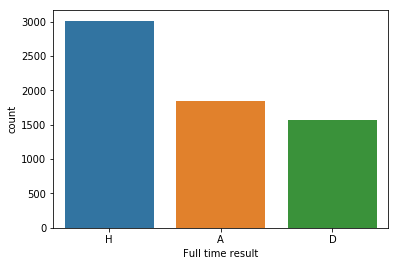

In [6]:
sns.countplot(x='Full time result',data=data)

In [7]:
data.head()

,HomeTeam,AwayTeam,Full time result,A,D,H
0,Man United,Leicester,H,0,0,1
1,Bournemouth,Cardiff,H,0,0,1
2,Fulham,Crystal Palace,A,1,0,0
3,Huddersfield,Chelsea,A,1,0,0
4,Newcastle,Tottenham,A,1,0,0


In [8]:
data.drop('Full time result',axis=1,inplace = True)

In [9]:
data = pd.concat([data, pd.get_dummies(data['HomeTeam'], prefix='HomeTeam')],axis=1)
data = pd.concat([data, pd.get_dummies(data['AwayTeam'], prefix='AwayTeam')],axis=1)
data.drop(['HomeTeam','AwayTeam'], axis=1, inplace=True)

In [10]:
data.head()

,A,D,H,HomeTeam_Alaves,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Ath Bilbao,HomeTeam_Ath Madrid,HomeTeam_Barcelona,HomeTeam_Betis,...,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Valencia,AwayTeam_Villarreal,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=data.drop(['A','D','H'],axis=1)
y=data[['A','D','H']]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [15]:
y_pred = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train).predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [17]:
accuracy_score(y_test,y_pred)

0.35921325051759834

In [24]:
classification_report(y_test,y_pred)

'             precision    recall  f1-score   support\n\n          0       0.60      0.33      0.42       548\n          1       0.00      0.00      0.00       472\n          2       0.65      0.56      0.60       912\n\navg / total       0.48      0.36      0.41      1932\n'

In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [27]:
model.fit(X, y) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
prd=model.predict(X_test)

In [29]:
classification_report(y_test,prd)

'             precision    recall  f1-score   support\n\n          0       0.70      0.54      0.61       548\n          1       0.68      0.35      0.46       472\n          2       0.75      0.71      0.73       912\n\navg / total       0.72      0.57      0.63      1932\n'

In [30]:
accuracy_score(y_test,prd)

0.5714285714285714

In [44]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)


In [45]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
predd = neigh.predict(X_test)

In [47]:
accuracy_score(y_test,predd)

0.39026915113871635